<a href="https://colab.research.google.com/github/balaprasanna20/ml-demo/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df=pd.read_csv('/content/Automobile.csv')
df


,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,usa
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,usa
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,usa


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_df = df.select_dtypes(include=np.number)
scaler.fit(numerical_df)

StandardScaler()

In [26]:
numerical_df = df.select_dtypes(include=np.number)
scaled_features = scaler.fit_transform(numerical_df)
print(scaled_features)

[[-0.7064387   1.49819126  1.0906037  ...  0.63086987 -1.29549834
  -1.62742629]
 [-1.09075062  1.49819126  1.5035143  ...  0.85433297 -1.47703779
  -1.62742629]
 [-0.7064387   1.49819126  1.19623199 ...  0.55047045 -1.65857724
  -1.62742629]
 ...
 [ 1.08701694 -0.85632057 -0.56103873 ... -0.79858454 -1.4407299
   1.62198339]
 [ 0.57460104 -0.85632057 -0.70507731 ... -0.40841088  1.10082237
   1.62198339]
 [ 0.95891297 -0.85632057 -0.71467988 ... -0.29608816  1.39128549
   1.62198339]]


In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled_features,df['origin'],test_size=0.30)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

# Create an imputer to handle missing values
imputer = SimpleImputer(strategy='mean')

# Impute missing values in the training and testing data
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train_imputed,y_train)
pred = knn.predict(x_test_imputed)

In [31]:

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
print(confusion_matrix(y_test,pred))

[[11  5  7]
 [ 5 10  3]
 [ 7  8 64]]


In [32]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      europe       0.48      0.48      0.48        23
       japan       0.43      0.56      0.49        18
         usa       0.86      0.81      0.84        79

    accuracy                           0.71       120
   macro avg       0.59      0.61      0.60       120
weighted avg       0.73      0.71      0.72       120



In [38]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

accuracy_rate = []

# Create an imputer to handle missing values
imputer = SimpleImputer(strategy='mean')
scaled_features_imputed = imputer.fit_transform(scaled_features)

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(knn,scaled_features_imputed,df['origin'],cv=10)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy\xa0Rate')

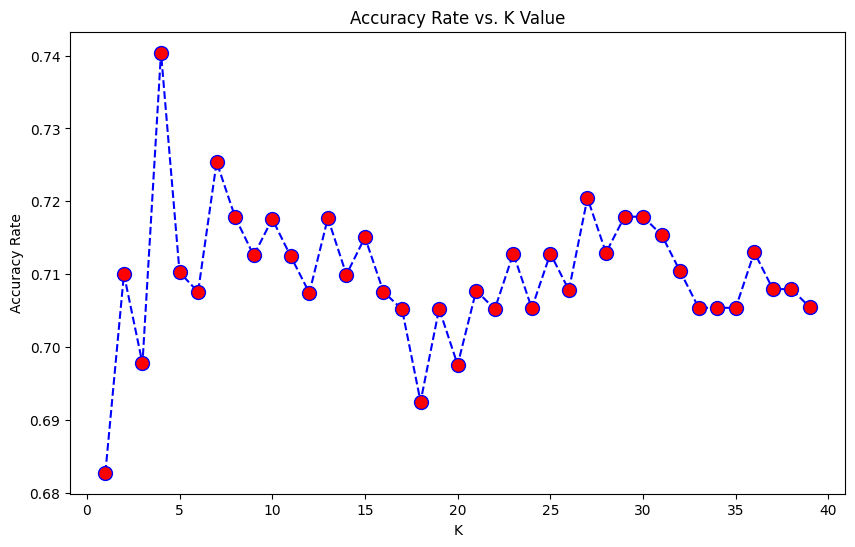

In [41]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

Text(0, 0.5, 'Error Rate')

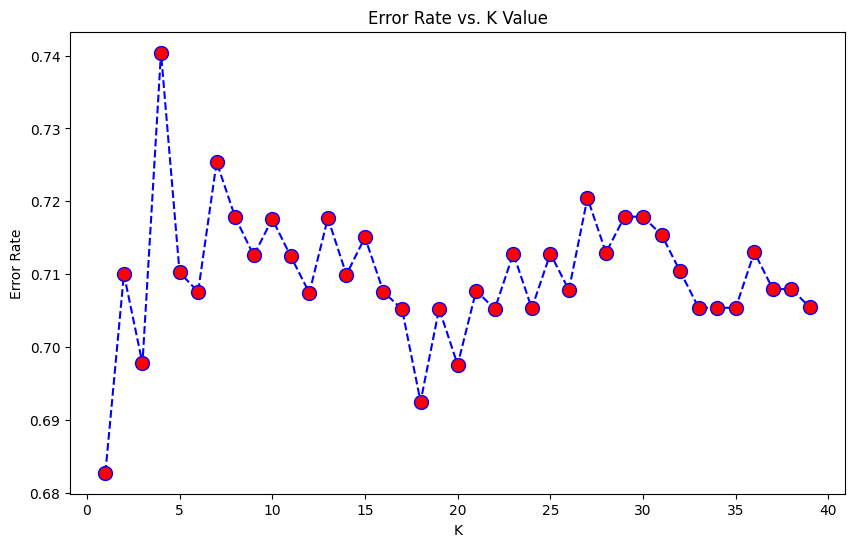

In [47]:

plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
  #       markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [46]:

knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(x_train_imputed,y_train)
pred = knn.predict(x_test_imputed)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[11  5  7]
 [ 6 10  2]
 [ 9  6 64]]


              precision    recall  f1-score   support

      europe       0.42      0.48      0.45        23
       japan       0.48      0.56      0.51        18
         usa       0.88      0.81      0.84        79

    accuracy                           0.71       120
   macro avg       0.59      0.61      0.60       120
weighted avg       0.73      0.71      0.72       120

